# Chapter 24: Plotting & Visualization

matplotlib fundamentals, pandas plotting, and creating publication-quality charts



### Visualization in Python (Slide 93)


<p><strong>matplotlib</strong> is the foundational plotting library in Python. Nearly every other plotting library is built on top of it.</p>
<p><strong>Key Libraries:</strong></p>
<ul>
<li><strong>matplotlib</strong> — low-level, full control, highly customizable</li>
<li><strong>pandas .plot()</strong> — convenient wrappers around matplotlib</li>
<li><strong>seaborn</strong> — statistical visualization, beautiful defaults</li>
</ul>
<p><strong>matplotlib Architecture:</strong></p>
<ul>
<li><code>Figure</code> — the overall window/page (can contain multiple plots)</li>
<li><code>Axes</code> — an individual plot/chart within a Figure</li>
<li><code>Axis</code> — the x-axis or y-axis of an Axes</li>
</ul>
<p><strong>Two Interfaces:</strong></p>
<ul>
<li><code>plt.*</code> — MATLAB-style, quick and simple</li>
<li><code>fig, ax = plt.subplots()</code> — object-oriented, recommended for complex plots</li>
</ul>


> **Note:** Install: pip install matplotlib seaborn


### matplotlib Basics (Slide 94)


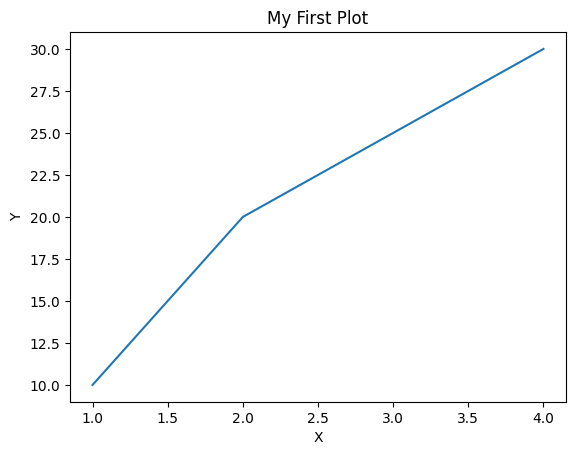

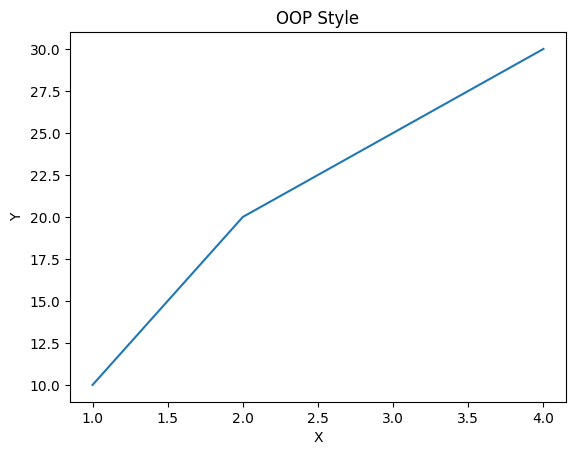

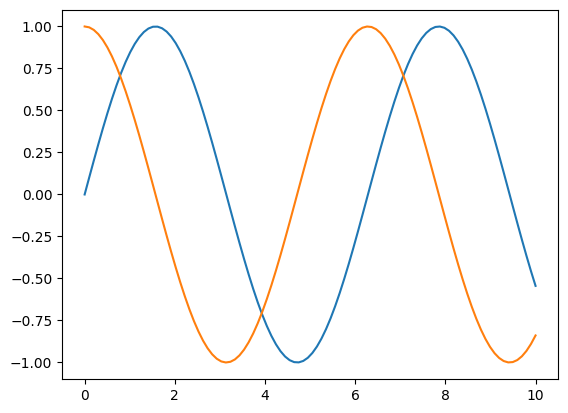

In [1]:
# plt.figure()     — create a new figure
# plt.plot(x, y)   — line plot
# plt.show()       — display the plot
# fig, ax = plt.subplots() — OOP style (recommended)
# ax.plot(x, y)    — plot on specific axes

import matplotlib.pyplot as plt
import numpy as np

# Quick MATLAB-style plot
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title('My First Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Object-oriented style (recommended)
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])
ax.set_title('OOP Style')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

# NumPy arrays for smooth curves
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
plt.show()


> **Note:** Always use fig, ax = plt.subplots() for production code


### Figures & Subplots (Slide 95)


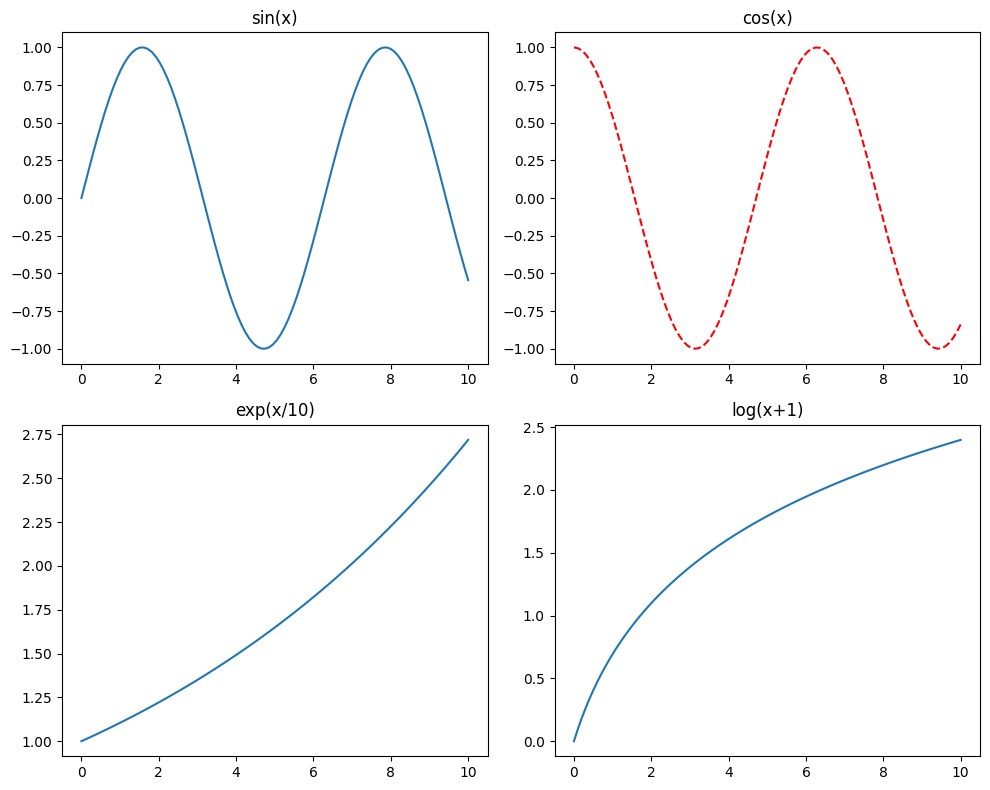

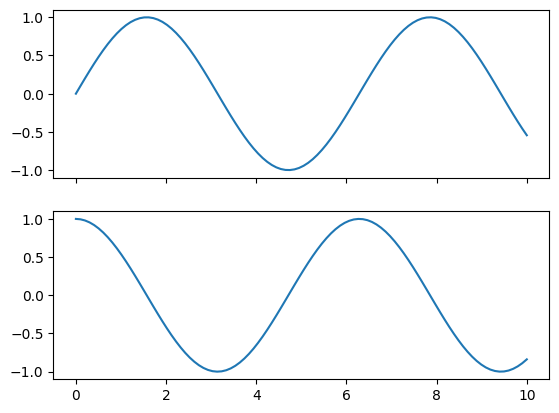

In [2]:
# plt.subplots(nrows, ncols)    — grid of subplots
# fig.set_size_inches(w, h)     — figure size
# plt.subplots_adjust(wspace, hspace) — spacing
# plt.tight_layout()            — auto-fix overlapping labels
# sharex=True, sharey=True      — shared axes

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

# 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(x, np.sin(x))
axes[0, 0].set_title('sin(x)')

axes[0, 1].plot(x, np.cos(x), 'r--')  # Red dashed
axes[0, 1].set_title('cos(x)')

axes[1, 0].plot(x, np.exp(x/10))
axes[1, 0].set_title('exp(x/10)')

axes[1, 1].plot(x, np.log(x + 1))
axes[1, 1].set_title('log(x+1)')

plt.tight_layout()  # Fix overlapping
plt.show()

# Shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))


> **Note:** Always call plt.tight_layout() to prevent label overlap


### Colors, Markers & Line Styles (Slide 96)


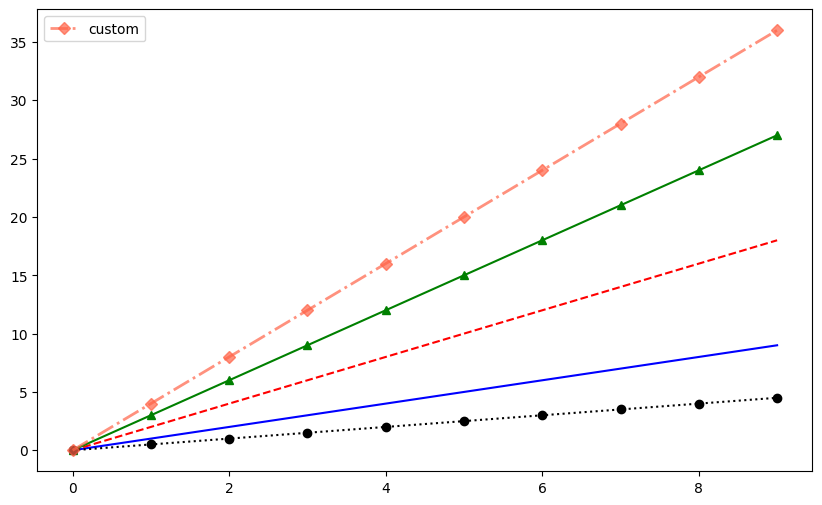

In [3]:
# Format string: 'color+marker+linestyle'
# Colors: 'b'=blue, 'r'=red, 'g'=green, 'k'=black, 'c'=cyan
# Markers: 'o'=circle, 's'=square, '^'=triangle, 'D'=diamond
# Lines: '-'=solid, '--'=dashed, ':'=dotted, '-.'=dashdot
# Also: color='#FF6347', linewidth=2, markersize=8, alpha=0.7

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
fig, ax = plt.subplots(figsize=(10, 6))

# Format string shorthand
ax.plot(x, x, 'b-')          # Blue solid line
ax.plot(x, x*2, 'r--')       # Red dashed
ax.plot(x, x*3, 'g^-')       # Green triangles + solid
ax.plot(x, x*0.5, 'ko:')     # Black circles + dotted

# Keyword arguments (more control)
ax.plot(x, x*4, color='#FF6347', linestyle='-.',
        linewidth=2, marker='D', markersize=6,
        alpha=0.7, label='custom')

ax.legend()
plt.show()

# Hex colors: '#FF6347' (tomato), '#4CAF50' (green)
# Named: 'steelblue', 'coral', 'darkviolet', 'gold'


> **Note:** 'ro--' = red circles with dashed lines (format string shorthand)


### Labels, Titles & Ticks (Slide 97)


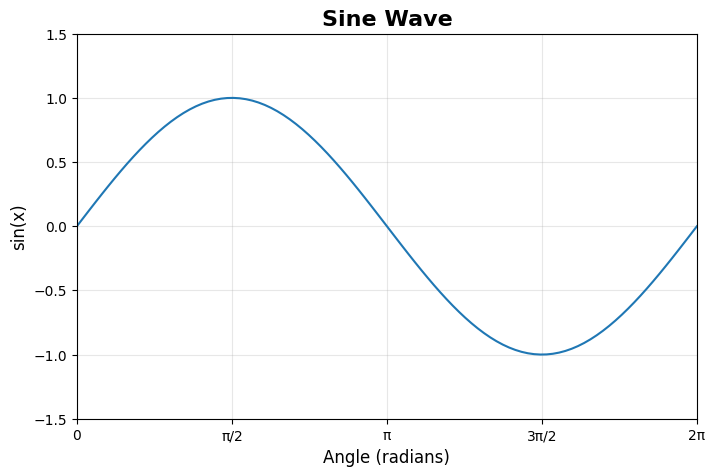

In [4]:
# ax.set_title('Title')      — plot title
# ax.set_xlabel('X Label')   — x-axis label
# ax.set_ylabel('Y Label')   — y-axis label
# ax.set_xlim(min, max)      — x-axis range
# ax.set_ylim(min, max)      — y-axis range
# ax.set_xticks([values])    — tick positions
# ax.set_xticklabels([...])  — tick labels (custom text)
# ax.grid(True)              — show grid lines

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))
x = np.linspace(0, 2 * np.pi, 100)
ax.plot(x, np.sin(x))

ax.set_title('Sine Wave', fontsize=16, fontweight='bold')
ax.set_xlabel('Angle (radians)', fontsize=12)
ax.set_ylabel('sin(x)', fontsize=12)

# Custom ticks
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])

ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
plt.show()


> **Note:** fontsize and fontweight control text appearance


### Annotations & Legends (Slide 98)


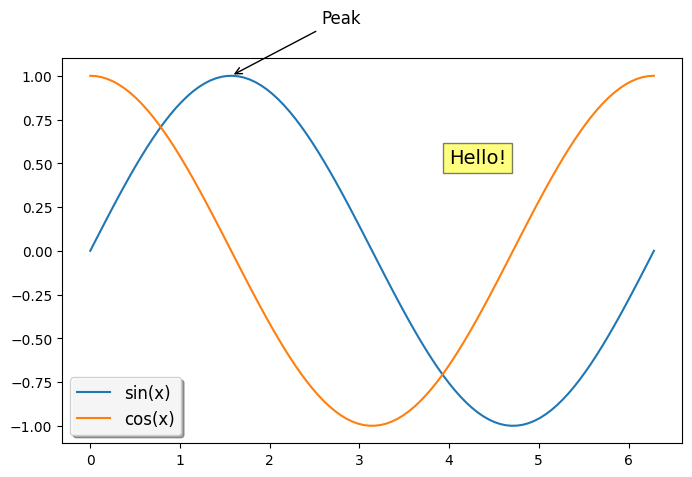

In [5]:
# ax.annotate('text', xy, xytext, arrowprops) — add annotation arrow
# ax.text(x, y, 'text') — place text at coordinates
# ax.legend()           — show legend (needs label= in plot calls)
# ax.legend(loc='best') — auto-position
# loc: 'upper right', 'lower left', 'center', etc.

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')

# Annotate a point with an arrow
ax.annotate('Peak', xy=(np.pi/2, 1),
            xytext=(np.pi/2 + 1, 1.3),
            fontsize=12,
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Place text
ax.text(4, 0.5, 'Hello!', fontsize=14,
        bbox=dict(facecolor='yellow', alpha=0.5))

# Legend
ax.legend(loc='lower left', fontsize=12,
          framealpha=0.9, shadow=True)
plt.show()


> **Note:** Always add label= to plot calls, then call ax.legend()


### Bar Charts & Histograms (Slide 99)


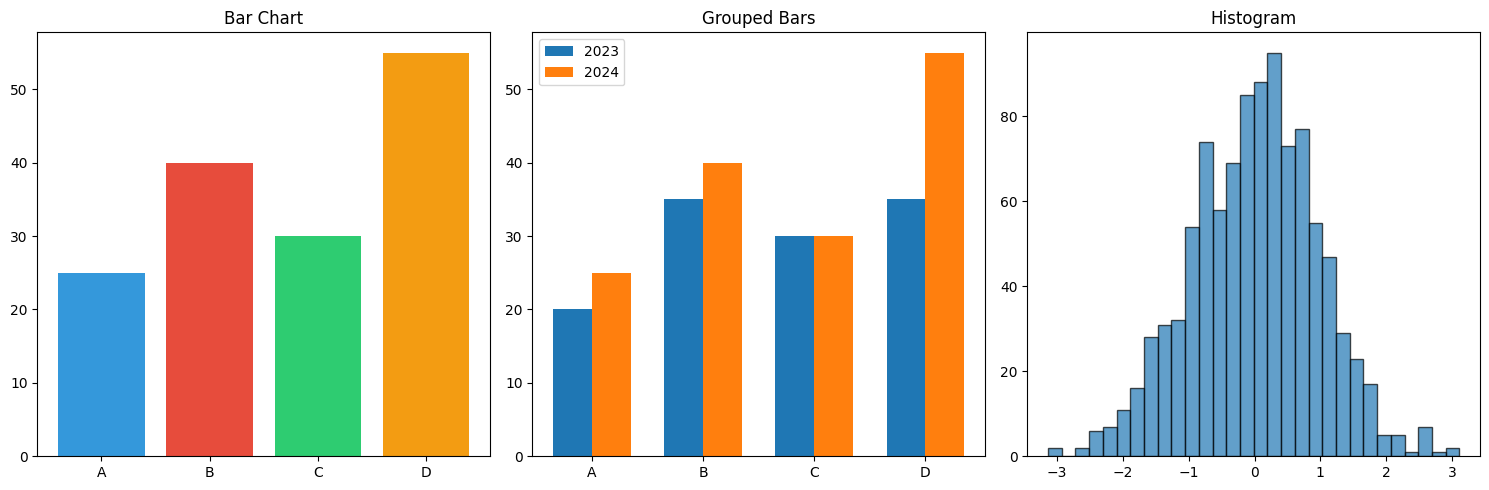

In [6]:
# ax.bar(x, height)       — vertical bar chart
# ax.barh(y, width)       — horizontal bar chart
# ax.hist(data, bins=N)   — histogram
# ax.hist(data, density=True) — normalized (area = 1)

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Bar chart
categories = ['A', 'B', 'C', 'D']
values = [25, 40, 30, 55]
axes[0].bar(categories, values, color=['#3498db', '#e74c3c',
            '#2ecc71', '#f39c12'])
axes[0].set_title('Bar Chart')

# Grouped bar chart
x = np.arange(4)
w = 0.35
axes[1].bar(x - w/2, [20, 35, 30, 35], w, label='2023')
axes[1].bar(x + w/2, [25, 40, 30, 55], w, label='2024')
axes[1].set_xticks(x)
axes[1].set_xticklabels(categories)
axes[1].legend()
axes[1].set_title('Grouped Bars')

# Histogram
data = np.random.randn(1000)
axes[2].hist(data, bins=30, edgecolor='black', alpha=0.7)
axes[2].set_title('Histogram')

plt.tight_layout()
plt.show()


> **Note:** edgecolor='black' makes histogram bars easier to distinguish


### Scatter Plots & More (Slide 100)


C:\Users\tkpar\AppData\Local\Temp\ipykernel_30124\1611163845.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data, labels=['A', 'B', 'C'])


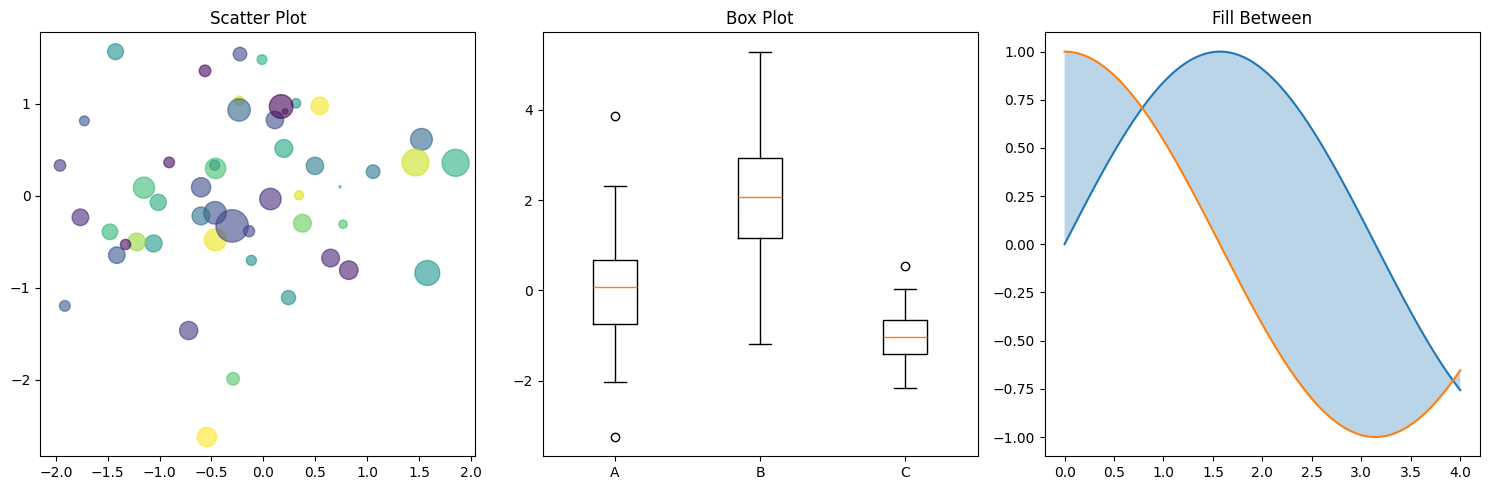

In [7]:
# ax.scatter(x, y)              — scatter plot
# ax.scatter(x, y, c=colors, s=sizes) — colored/sized points
# ax.pie(sizes, labels=labels)   — pie chart
# ax.boxplot(data)               — box plot
# ax.fill_between(x, y1, y2)     — shaded area

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter with color and size
np.random.seed(42)
n = 50
x = np.random.randn(n)
y = np.random.randn(n)
colors = np.random.rand(n)
sizes = np.abs(np.random.randn(n)) * 200
axes[0].scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='viridis')
axes[0].set_title('Scatter Plot')

# Box plot
data = [np.random.randn(100) * s + m
        for s, m in [(1, 0), (1.5, 2), (0.5, -1)]]
axes[1].boxplot(data, labels=['A', 'B', 'C'])
axes[1].set_title('Box Plot')

# Area fill
x = np.linspace(0, 4, 100)
axes[2].fill_between(x, np.sin(x), np.cos(x), alpha=0.3)
axes[2].plot(x, np.sin(x), x, np.cos(x))
axes[2].set_title('Fill Between')

plt.tight_layout()
plt.show()


> **Note:** c= sets point color, s= sets point size, cmap= sets colormap


### Saving Figures (Slide 101)


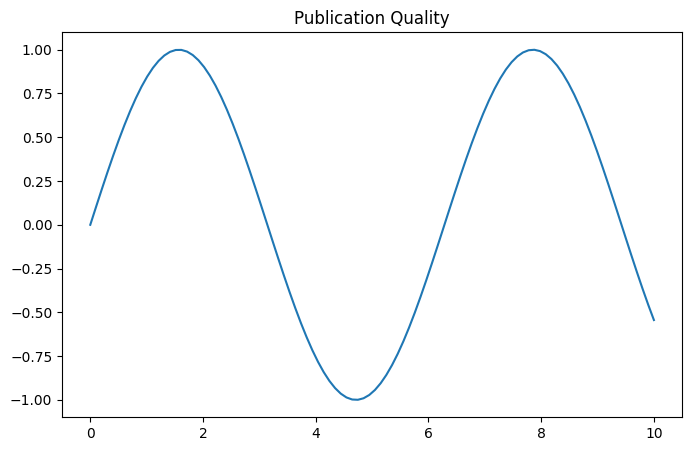

In [8]:
# fig.savefig('file.png')       — save as PNG (default)
# fig.savefig('file.pdf')       — save as PDF (vector)
# fig.savefig('file.svg')       — save as SVG (vector)
# dpi=300                       — resolution (dots per inch)
# bbox_inches='tight'           — crop whitespace
# transparent=True              — transparent background
# facecolor='white'             — background color

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))
x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))
ax.set_title('Publication Quality')

# Save as high-resolution PNG
fig.savefig('plot.png', dpi=300, bbox_inches='tight')

# Save as PDF (vector — scales perfectly)
fig.savefig('plot.pdf', bbox_inches='tight')

# Save as SVG (vector — great for web)
fig.savefig('plot.svg', bbox_inches='tight')

# Transparent background (for presentations)
fig.savefig('plot_transparent.png', dpi=300,
            transparent=True, bbox_inches='tight')

# Supported formats: png, pdf, svg, eps, jpg, tif


> **Note:** Use dpi=300 and bbox_inches='tight' for publication quality


### pandas Built-in Plotting (Slide 102)


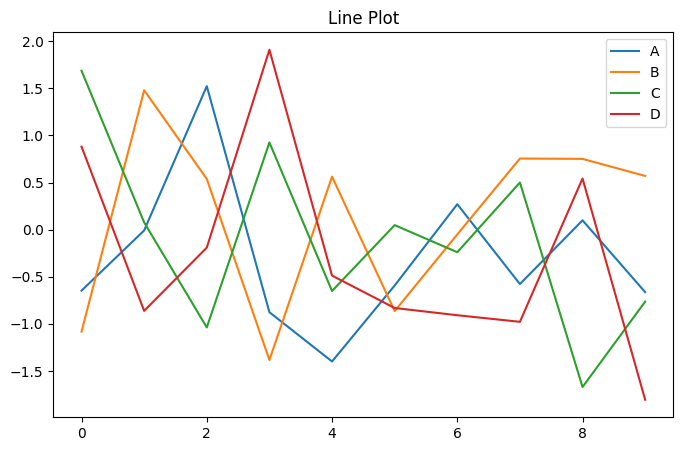

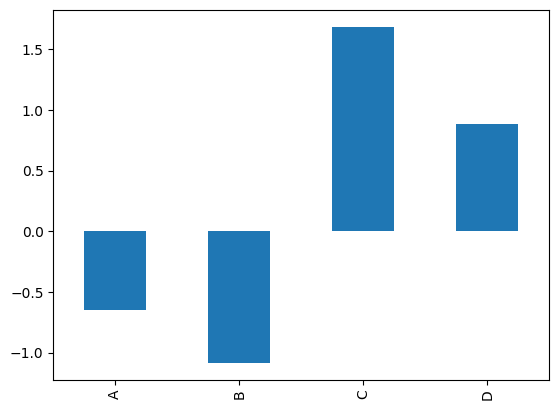

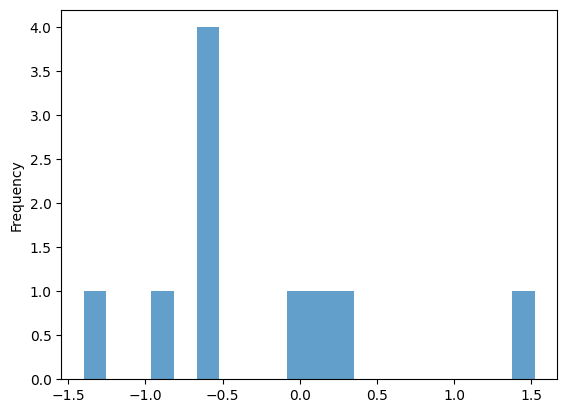

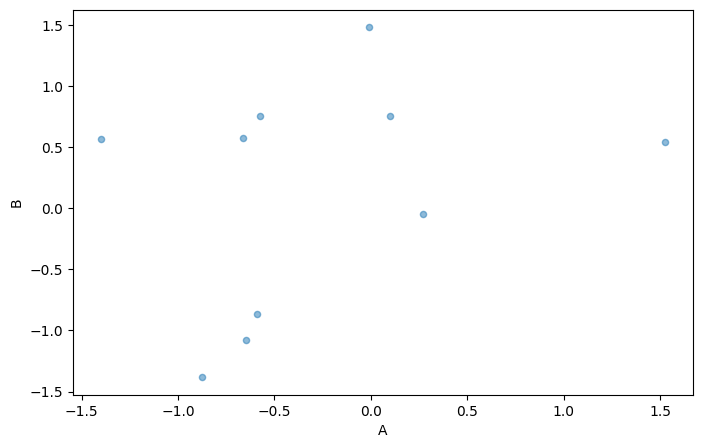

In [9]:
# df.plot()             — line plot (default)
# df.plot.bar()         — bar chart
# df.plot.barh()        — horizontal bar
# df.plot.hist()        — histogram
# df.plot.box()         — box plot
# df.plot.scatter()     — scatter plot
# df.plot.pie()         — pie chart
# df.plot.area()        — stacked area
# All use matplotlib under the hood!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['A', 'B', 'C', 'D'])

# Line plot — each column is a line
df.plot(figsize=(8, 5), title='Line Plot')
plt.show()

# Bar chart
df.iloc[0].plot.bar()
plt.show()

# Histogram
df['A'].plot.hist(bins=20, alpha=0.7)
plt.show()

# Scatter plot
df.plot.scatter(x='A', y='B', alpha=0.5, figsize=(8, 5))
plt.show()


> **Note:** pandas .plot() is the fastest way to visualize DataFrames


### pandas Plotting: Advanced (Slide 103)


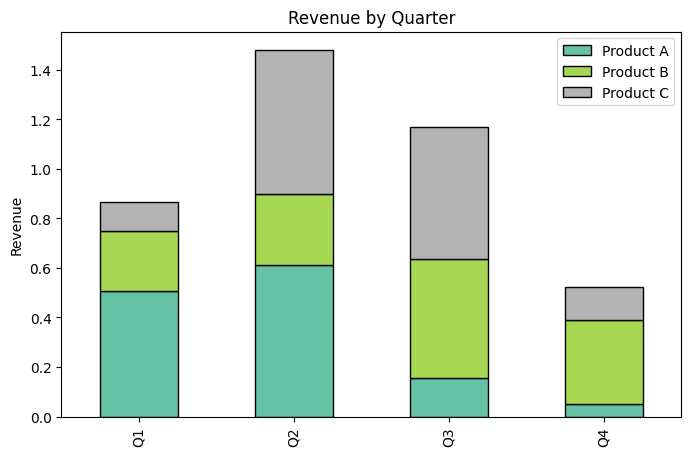

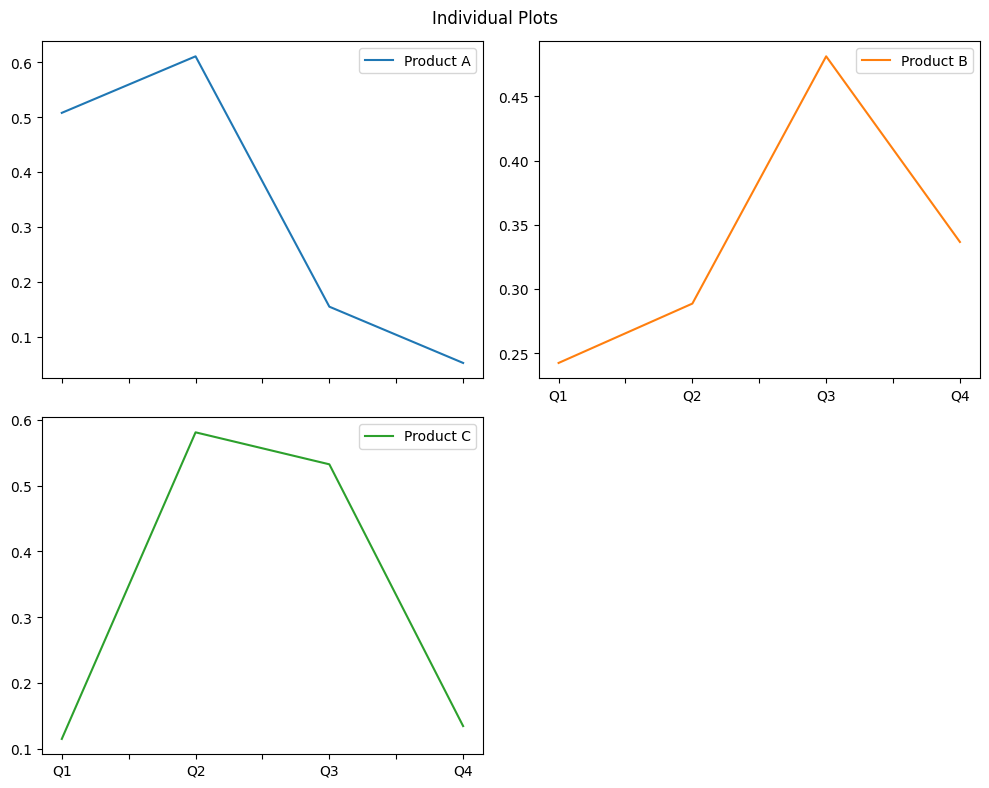

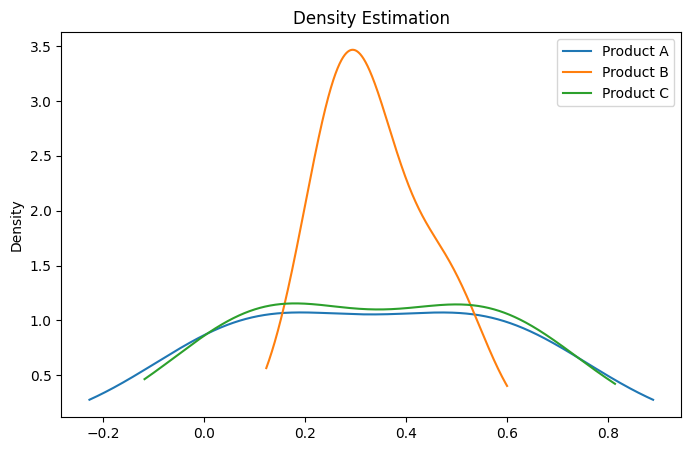

In [10]:
# Stacked bar, grouped bar, density plots, and more
# kind='bar'     — bar chart
# kind='kde'     — kernel density estimate (smooth histogram)
# stacked=True   — stack bars
# subplots=True  — each column in its own subplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.rand(4, 3),
                  index=['Q1', 'Q2', 'Q3', 'Q4'],
                  columns=['Product A', 'Product B', 'Product C'])

# Stacked bar chart
df.plot.bar(stacked=True, figsize=(8, 5),
            colormap='Set2', edgecolor='black')
plt.title('Revenue by Quarter')
plt.ylabel('Revenue')
plt.show()

# Each column as separate subplot
df.plot(subplots=True, layout=(2, 2), figsize=(10, 8),
        title='Individual Plots')
plt.tight_layout()
plt.show()

# KDE (density) plot
df.plot.kde(figsize=(8, 5), title='Density Estimation')
plt.show()


> **Note:** stacked=True is great for composition analysis


### Seaborn: Statistical Visualization (Slide 104)


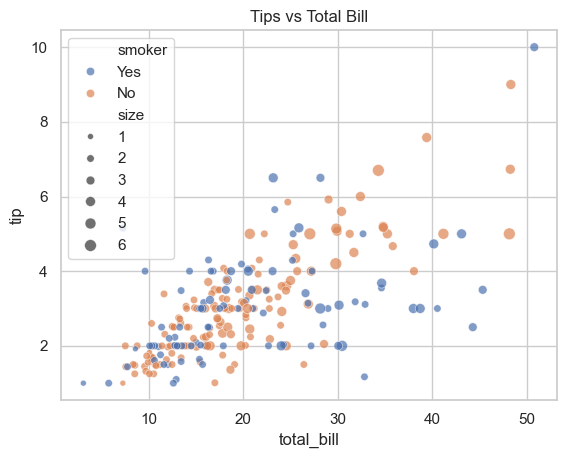

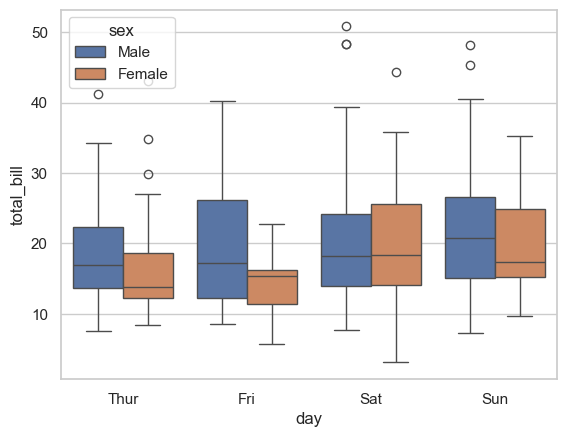

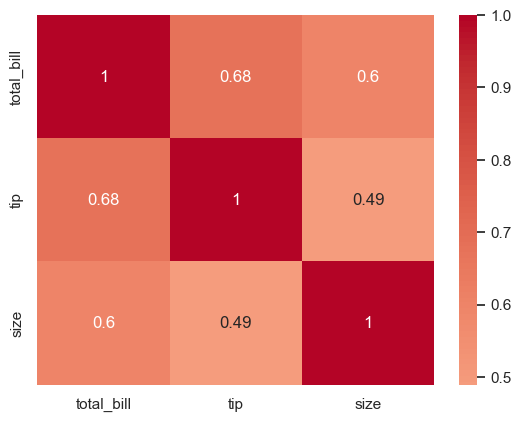

In [11]:
# seaborn wraps matplotlib with beautiful defaults
# sns.set_theme()          — apply seaborn styling
# sns.histplot(data, x)    — histogram + optional KDE
# sns.scatterplot(data, x, y, hue) — scatter with categories
# sns.boxplot(data, x, y)  — box plot
# sns.heatmap(data)        — colored matrix
# sns.pairplot(data)       — scatter matrix for all pairs

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')  # Clean look

# Built-in dataset
tips = sns.load_dataset('tips')

# Scatter with categorical coloring
sns.scatterplot(data=tips, x='total_bill', y='tip',
                hue='smoker', size='size', alpha=0.7)
plt.title('Tips vs Total Bill')
plt.show()

# Box plot by category
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')
plt.show()

# Heatmap (correlation matrix)
sns.heatmap(tips.select_dtypes('number').corr(),
            annot=True, cmap='coolwarm', center=0)
plt.show()


> **Note:** seaborn's hue parameter auto-colors by category


### Seaborn: Distribution & Pair Plots (Slide 105)


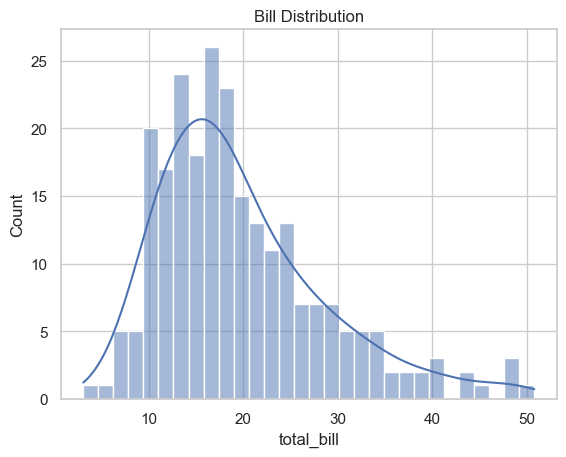

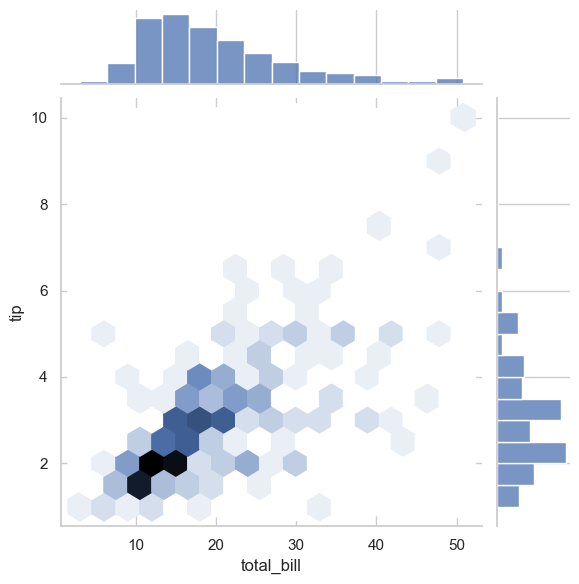

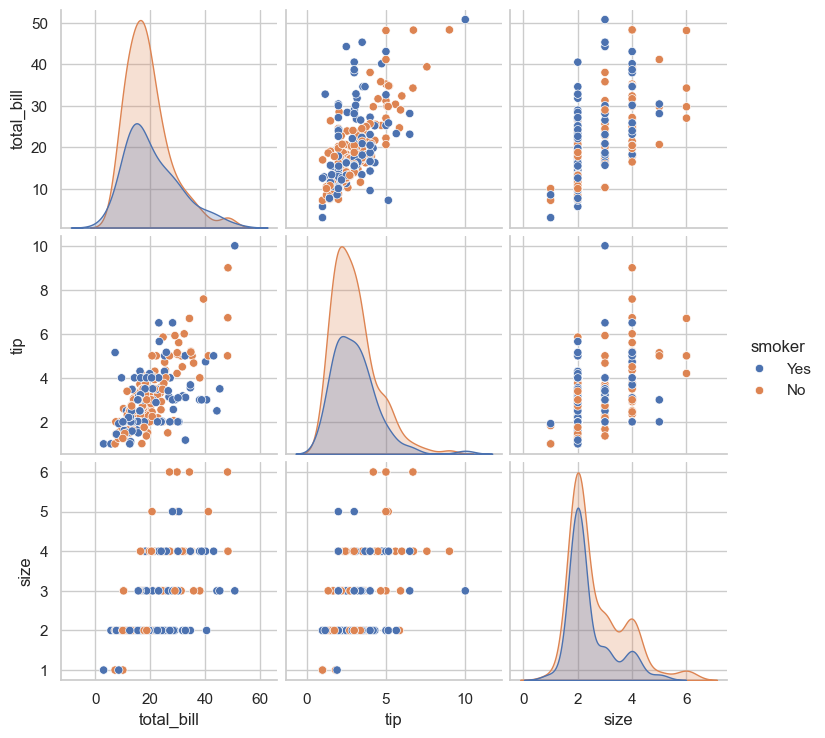

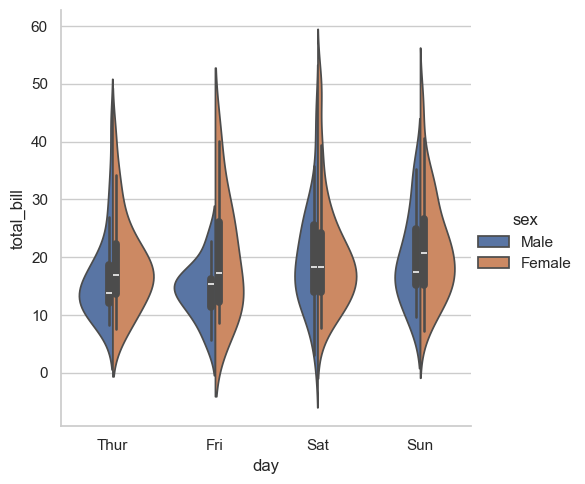

In [12]:
# sns.histplot(data, kde=True)  — histogram with density curve
# sns.kdeplot(data)             — smooth density estimate
# sns.pairplot(df)              — scatter + hist for ALL column pairs
# sns.jointplot(data, x, y)     — scatter + marginal distributions
# sns.catplot(data, kind='...')  — categorical plot (bar, box, violin)

import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

# Distribution with KDE
sns.histplot(data=tips, x='total_bill', kde=True, bins=30)
plt.title('Bill Distribution')
plt.show()

# Joint plot: scatter + marginal histograms
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.show()

# Pair plot: all numeric variable pairs
sns.pairplot(tips, hue='smoker', diag_kind='kde')
plt.show()

# Violin plot (box + density)
sns.catplot(data=tips, x='day', y='total_bill',
            kind='violin', hue='sex', split=True)
plt.show()


> **Note:** pairplot gives instant overview of relationships between all variables


### Plot Type Cheat Sheet (Slide 106)


<p><strong>Which Plot to Use?</strong></p>
<table>
<tr><th>Data Type</th><th>Plot</th><th>Function</th></tr>
<tr><td>Trend over time</td><td>Line</td><td><code>ax.plot()</code></td></tr>
<tr><td>Compare categories</td><td>Bar</td><td><code>ax.bar()</code></td></tr>
<tr><td>Distribution</td><td>Histogram</td><td><code>ax.hist()</code></td></tr>
<tr><td>Smooth distribution</td><td>KDE</td><td><code>sns.kdeplot()</code></td></tr>
<tr><td>Relationship (2 vars)</td><td>Scatter</td><td><code>ax.scatter()</code></td></tr>
<tr><td>Spread / outliers</td><td>Box plot</td><td><code>ax.boxplot()</code></td></tr>
<tr><td>Composition</td><td>Pie / Stacked bar</td><td><code>ax.pie()</code></td></tr>
<tr><td>Correlation matrix</td><td>Heatmap</td><td><code>sns.heatmap()</code></td></tr>
<tr><td>All pairs overview</td><td>Pair plot</td><td><code>sns.pairplot()</code></td></tr>
</table>
<p><strong>Style Tips:</strong></p>
<ul>
<li>Use <code>figsize=(w, h)</code> to control plot size</li>
<li>Always label axes and add a title</li>
<li>Use <code>alpha</code> for overlapping data points</li>
<li>Use <code>dpi=300</code> + <code>bbox_inches='tight'</code> when saving</li>
<li><code>sns.set_theme()</code> instantly improves matplotlib aesthetics</li>
</ul>


> **Note:** Start with pandas .plot() for speed, upgrade to seaborn for beauty
